Question No 2 Solution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import math

part (a)
"A" matrix generation:-
i used vectorized implementation to produce matrix A (without the for loops).
Numpy operations are way more faster than for loops

In [3]:

def A_matrix_producer(M, B, S):
	m = np.linspace(1,M,M).reshape(M,1)
	t = (m-1)/(M-1)
	
	BS=B*S
	k= np.linspace(-BS, BS,2*BS+1).reshape(2*BS+1,1).T
	
	#vectorized implementation to generate matrix A
	A = np.exp(np.dot(t, k/S)*2*pi*1j)
	print("A matrix shape: ",A.shape)
	return A


part(b) generating the function g(t) = cos(2π^2t)

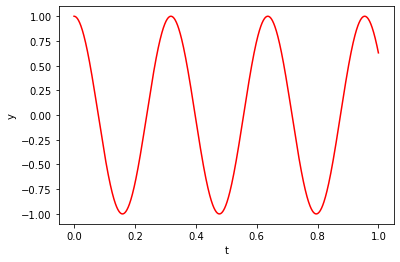

In [4]:
M=1024
m = np.linspace(1,M,M)
t = (m-1)/(M-1) 
Y = np.cos(2*(pi**2)*t).reshape(M,1)
plt.plot(t,Y,'r')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

In [5]:

A = A_matrix_producer(M, 16, 3)    #M=1024 defined in cell above



A matrix shape:  (1024, 97)


Computing SVD of A

displaying the U matrix
displaying the Sigma (S) matrix
displaying the Vh matrix


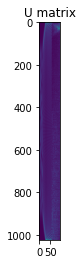

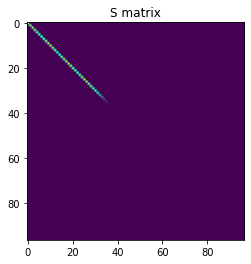

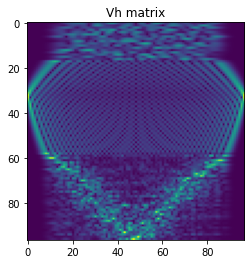

In [10]:
U, S, Vh = np.linalg.svd(A, full_matrices=False)
#converting 1D S to diagonal 2D sigma matrix
S = np.diag(S)

print("displaying the U matrix")
plt.figure()
plt.imshow(abs(U))
plt.title("U matrix")
plt.figure()
print("displaying the Sigma (S) matrix")
plt.imshow(abs(S))
plt.title("S matrix")
plt.figure()
print("displaying the Vh matrix")
plt.imshow(abs(Vh))
plt.title("Vh matrix")

# numpy SVD function returns the V matrtix as its conjugate transpose (Hermitian) 
#so we need to convert this to V by taking conjugate transpose
V = Vh.T.conj()
A_reconstruct = np.dot(np.dot(U,S),Vh) 

alpha_hat = np.dot(np.dot(np.dot(V,np.linalg.inv(S)),U.T.conj()),Y)  # V S inv Uh

y_pred_clean= np.dot(A_reconstruct, alpha_hat)


Plotting the reconstruction A@alpha

/home/shahabkhan/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


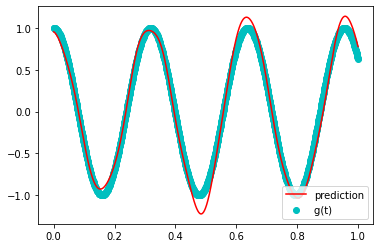

In [11]:
plt.plot(t,y_pred_clean, color = 'r')
plt.scatter(t,Y, color = 'c')
plt.legend(["prediction", "g(t) "], loc ="lower right")
plt.show()

Part(C) generation the noise whose l2 norm is 1 (for the worst case)

In [18]:
def randomvector(n):
    components = [np.random.normal() for i in range(n)]
    r = math.sqrt(sum(x*x for x in components))
    v = [x/r for x in components]
    return v

noise = np.asfarray(randomvector(M)).reshape(M,1)

print("l2 norm of noise",np.linalg.norm(noise))

l2 norm of noise 0.9999999999999999


adding noise to the given function

(1024, 1)
(1024, 1)
(1024, 1)


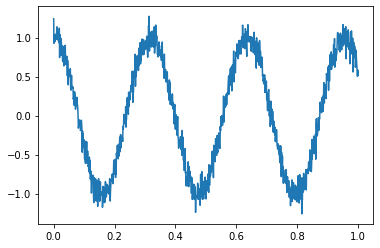

In [16]:
y_noisy = np.sum((Y,  noise),axis=0)
print(noise.shape)
print(Y.shape)
print(y_noisy.shape)
plt.plot(t, y_noisy)

highest value of alpha_hat_noisy 1752296735276.4504


/home/shahabkhan/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Noisy alpha_hat values')

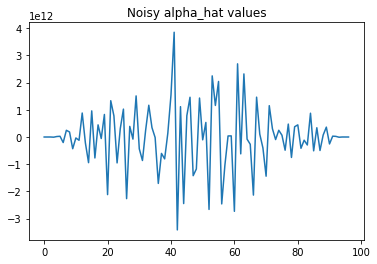

In [23]:

#calculation of alpha for noisy signal
alpha_hat_noisy =  np.dot(np.dot(np.dot(V,np.linalg.inv(S)),U.T.conj()),y_noisy)  # V S inv Uh
print("highest value of alpha_hat_noisy",abs(np.amax( np.dot(np.dot(np.dot(V, np.linalg.inv(S)),U.T.conj()),noise))))
plt.plot(alpha_hat_noisy)
plt.title("Noisy alpha_hat values")


As we can see from values of noisy alpha_hat the values are very high (in range 10e12) So small
perturbation of y that leads to a very large change in α

part(d)

/home/shahabkhan/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/shahabkhan/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


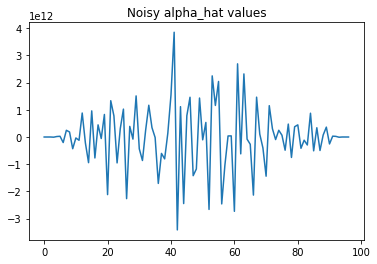

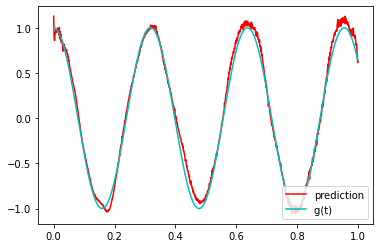

In [22]:

y_pred2= np.dot(A_reconstruct, alpha_hat_noisy)
plt.figure()
plt.plot(t,y_pred2, color = 'r')
plt.plot(t,Y, color = 'c')
plt.legend(["prediction", "g(t) "], loc ="lower right")
plt.show()

Does the perturbation found in part (c), which leads to a large error in α, also lead to
a large error in the reconstruction provided by Aα? Explain why or why not?

Yes the perturbation caused the recoonstruction to deform(not a perfect reconstruction) this is because of very high value of alpha hat noisy caused the signal reconstruction to deform